In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**(1)** By using distribution=np.random.name_distribution([],[]), write the name of distribution of your choice in place of `name_distribution`and fill out the bracket with your choice again. Then please, 

**(a)** Draw the histogram and interpret

In [2]:
np.random.seed(42)

mu, sigma, n = 50, 10, 1000
distribution = np.random.normal(mu, sigma, n)

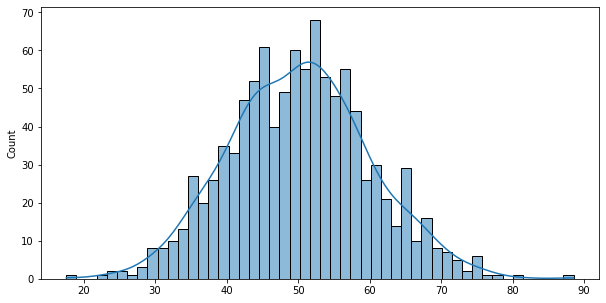

In [3]:
plt.figure(figsize=(10, 5))
sns.histplot(distribution, bins=50, kde=True);

#There is a symmetrical distribution with a mean of 50. 

**(b)** Draw Q-Q plot and interpret

In [4]:
normal_distribution = np.random.normal(np.mean(distribution), np.std(distribution), 1000)

distribution.sort()
normal_distribution.sort()

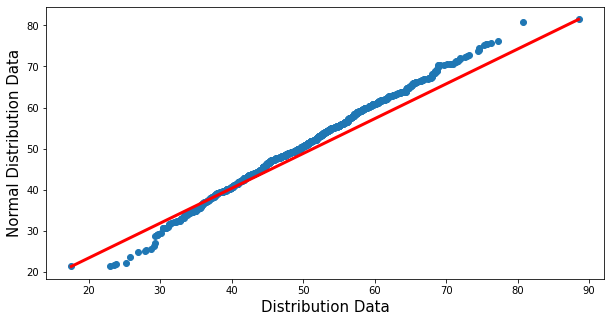

In [5]:
plt.figure(figsize=(10, 5))
plt.xlabel('Distribution Data', fontsize=15)
plt.ylabel('Normal Distribution Data', fontsize=15)
plt.scatter(distribution, normal_distribution)
plt.plot([np.min(distribution), np.max(distribution)],
         [np.min(normal_distribution), np.max(normal_distribution)], c='red', linewidth=3);




**(2)** Get the google stock quotes from 2015-2017 using https://finance.yahoo.com/. Using this data, calculate the stock return with the following formula:

$$P_t-P_{t-1}/P_{t-1}$$

where $P_t$ represents the stock price at time t and $P_{t-1}$ denotes the stock price at time t-1. What do you think about the return distribution? 

**Note:** Data is retrieved from https://finance.yahoo.com/ as follows. After clicking the given address, type the name of the stock you want to search in the search section (eg google). Click on the search result below to go to the relevant stock. When you get to the page with the relevant stock information, click the Historical Prices tab, select the relevant date range, then click Apply. Finally, click the Download Data button to download the data. Alternative you can use `yfinance` library

In [6]:
apple = pd.read_csv('AAPL.csv')
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,111.389999,111.440002,107.349998,109.330002,105.664818,53204626
1,2015-01-05,108.290001,108.650002,105.410004,106.250000,102.688095,64285491
2,2015-01-06,106.540001,107.430000,104.629997,106.260002,102.697754,65797116
3,2015-01-07,107.199997,108.199997,106.695000,107.750000,104.137794,40105934
4,2015-01-08,109.230003,112.150002,108.699997,111.889999,108.139000,59364547


In [7]:
try:
    for i in range(len(apple)):
        apple.loc[i, 'price_return'] = (apple.loc[i+1, 'Volume'] - apple.loc[i, 'Volume']) / apple.loc[i, 'Volume']
except:
    pass

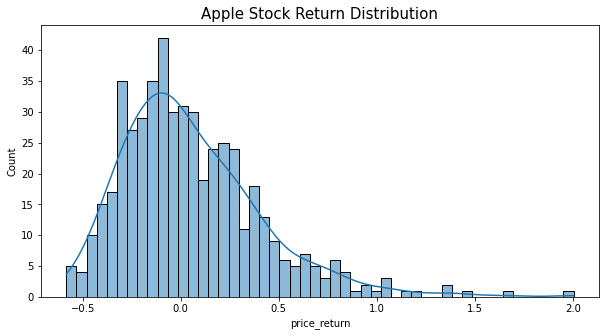

In [8]:
plt.figure(figsize=(10, 5))
plt.title('Apple Stock Return Distribution', fontsize=15)
sns.histplot(apple['price_return'].dropna(), bins=50, kde=True);


The return distribution is negatively-skewed.So , the mean is bigger than the median. 
